In [1]:

#  _____ _ _              _       ______             _ _      _   _                 
# |_   _(_) |            (_)      | ___ \           | (_)    | | (_)                
#   | |  _| |_ __ _ _ __  _  ___  | |_/ / __ ___  __| |_  ___| |_ _  ___  _ __  ___ 
#   | | | | __/ _` | '_ \| |/ __| |  __/ '__/ _ \/ _` | |/ __| __| |/ _ \| '_ \/ __|
#   | | | | || (_| | | | | | (__  | |  | | |  __/ (_| | | (__| |_| | (_) | | | \__ \
#   \_/ |_|\__\__,_|_| |_|_|\___| \_|  |_|  \___|\__,_|_|\___|\__|_|\___/|_| |_|___/

In [2]:
# AUTHORS: Gianna Galard, George Melek, Austin Li
# CSC412 PROFESSOR IMBERMAN
# DATE: 11/23/2021

In [3]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# split data
from sklearn.model_selection import train_test_split
# encoding
from sklearn.preprocessing import LabelEncoder
# logistic regression
from sklearn.linear_model import LogisticRegression
# decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# svm
from sklearn.svm import SVC
# accuracy 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, plot_confusion_matrix

In [4]:
# import data from csv file for training
dataset = pd.read_csv('data/train.csv')
# dataset = pd.read_csv('/Users/george/Downloads/train.csv')
dataset # print dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# shape of train dataframes
dataset.shape 

(891, 12)

In [6]:
# first 5 rows of train dataframe
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# print train dataframe info 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# generate statistics
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# output columns with labels
# select all columns that are objects
categorical_columns = dataset.select_dtypes(include=['object'])
# print number of categorical columns
print(f'There are {len(categorical_columns.columns.tolist())} categorical columns in the dataset:')
# for each column in categorical columns, print column name and number of unique values
for cols in categorical_columns.columns: 
    print(cols,':', len(categorical_columns[cols].unique()),'labels')

There are 5 categorical columns in the dataset:
Name : 891 labels
Sex : 2 labels
Ticket : 681 labels
Cabin : 148 labels
Embarked : 4 labels


DATA CLEANING AND FEATURE ENGINEERING

In [10]:
# create boolean for each of the embarkment points
# for each value in the Embarked column
# instead of value use uwu for funsies ahaha
for uwu in dataset.Embarked.unique(): 
    # if it is a string (just to be safe lol)
    if type(uwu) == str: 
        # create a new column with the boolean value
        dataset['Embark' + uwu] = (dataset.Embarked == uwu) * 1 

In [11]:
# create boolean for is male
dataset['isMale'] = (dataset.Sex == 'male') * 1 

In [12]:
# create boolean for has cabin
dataset.loc[:, 'has_cabin'] = 0
dataset.loc[dataset.Cabin.isna(), 'has_cabin'] = 1

In [13]:
# check for missing values in the data
print(dataset.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
EmbarkS          0
EmbarkC          0
EmbarkQ          0
isMale           0
has_cabin        0
dtype: int64


In [14]:
# fill missing age values as 100 
dataset['Age'] = dataset['Age'].fillna(100)
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,EmbarkS,EmbarkC,EmbarkQ,isMale,has_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,0,0,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,100.0,1,2,W./C. 6607,23.4500,NaN,S,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1,0,1,0


In [15]:
# split data in train and test sets
selected = dataset[["Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"]] 
Y = dataset["Survived"]

In [16]:
# drop rows with nul and nan
dataset.dropna(how = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,EmbarkS,EmbarkC,EmbarkQ,isMale,has_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,0,0,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,100.0,1,2,W./C. 6607,23.4500,NaN,S,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1,0,1,0


In [17]:
# Split data and apply label encoder to the sex and embarked columns
featName = ["Pclass", "Age", "Sex", "SibSp", "Parch", "Embarked"]
X = dataset[featName]
X # print

,Pclass,Age,Sex,SibSp,Parch,Embarked
0,3,22.0,male,1,0,S
1,1,38.0,female,1,0,C
2,3,26.0,female,0,0,S
3,1,35.0,female,1,0,S
4,3,35.0,male,0,0,S
...,...,...,...,...,...,...
886,2,27.0,male,0,0,S
887,1,19.0,female,0,0,S
888,3,100.0,female,1,2,S
889,1,26.0,male,0,0,C


In [18]:
label_Encoder = LabelEncoder()
X["Sex"] = label_Encoder.fit_transform(X["Sex"])
X["Embarked"] = label_Encoder.fit_transform(X["Embarked"])
X # print
# i get a scary warning but ... it works ??? so not worried lol

<ipython-input-18-21f5b202671b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Sex"] = label_Encoder.fit_transform(X["Sex"])
<ipython-input-18-21f5b202671b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Embarked"] = label_Encoder.fit_transform(X["Embarked"])


,Pclass,Age,Sex,SibSp,Parch,Embarked
0,3,22.0,1,1,0,2
1,1,38.0,0,1,0,0
2,3,26.0,0,0,0,2
3,1,35.0,0,1,0,2
4,3,35.0,1,0,0,2
...,...,...,...,...,...,...
886,2,27.0,1,0,0,2
887,1,19.0,0,0,0,2
888,3,100.0,0,1,2,2
889,1,26.0,1,0,0,0


In [19]:
y = dataset["Survived"]
y # print

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [21]:
# create an accurate model
# 1. Logistic Regression Algorithm
# 2. Decision Tree Algorithm
# 3. Support Vector Machine Algorithm

In [22]:
                                                                          
#  __            _     _   _        _____                         _         
# |  |   ___ ___|_|___| |_|_|___   | __  |___ ___ ___ ___ ___ ___|_|___ ___ 
# |  |__| . | . | |_ -|  _| |  _|  |    -| -_| . |  _| -_|_ -|_ -| | . |   |
# |_____|___|_  |_|___|_| |_|___|  |__|__|___|_  |_| |___|___|___|_|___|_|_|
#           |___|                            |___|                          

In [23]:
logitModel = LogisticRegression().fit(X_train, y_train) # create logistic regression model
y_pred = logitModel.predict(X_test) # predict test set

accuracy = accuracy_score(y_test, y_pred) # calculate accuracy

# print accuracy
print("Accuracy Score -> {}".format(accuracy))

Accuracy Score -> 0.7947761194029851


In [24]:
y_pred_LR = logitModel.predict(X_test)
print(classification_report(y_test, y_pred_LR))
print("ROC AUC Score is {}".format(roc_auc_score(y_test, y_pred_LR)))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       157
           1       0.76      0.73      0.75       111

    accuracy                           0.79       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.79      0.79      0.79       268

ROC AUC Score is 0.7852470304699605


In [25]:
scores_accuracy = cross_val_score(logitModel, X, y, cv = 9, scoring = 'accuracy')
print('Cross Validation results:')
print("Logistic reg average accuracy is %2.3f" % scores_accuracy.mean())

Cross Validation results:
Logistic reg average accuracy is 0.789


Confusion Matrix for Logistic Regression


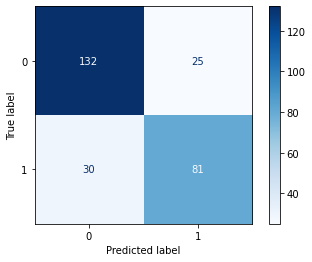

In [26]:
print("Confusion Matrix for Logistic Regression")
displr = plot_confusion_matrix(logitModel, X_test, y_test,cmap=plt.cm.Blues, values_format='d')

In [27]:
#  ____          _     _            _____            
# |    \ ___ ___|_|___|_|___ ___   |_   _|__ ___ ___ 
# |  |  | -_|  _| |_ -| | . |   |    | ||  _| -_| -_|
# |____/|___|___|_|___|_|___|_|_|    |_||_| |___|___|                                             

In [28]:
dta = DecisionTreeClassifier(max_depth = 5).fit(X_train, y_train) # create decision tree model
y_pred = dta.predict(X_test) # predict test set

accuracy = accuracy_score(y_test, y_pred) # calculate accuracy

# print accuracy
print("Accuracy Score -> {}".format(accuracy))

Accuracy Score -> 0.75


In [29]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       176
           1       0.61      0.74      0.67        92

    accuracy                           0.75       268
   macro avg       0.73      0.75      0.73       268
weighted avg       0.77      0.75      0.75       268



Confusion Matrix for Decision Tree Classifier


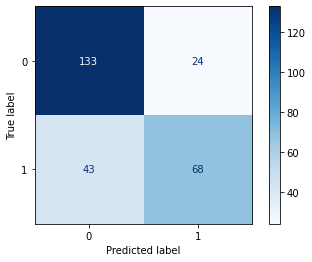

In [30]:
print("Confusion Matrix for Decision Tree Classifier")
decision_confusion = plot_confusion_matrix(dta, X_test, y_test ,cmap=plt.cm.Blues , values_format='d')

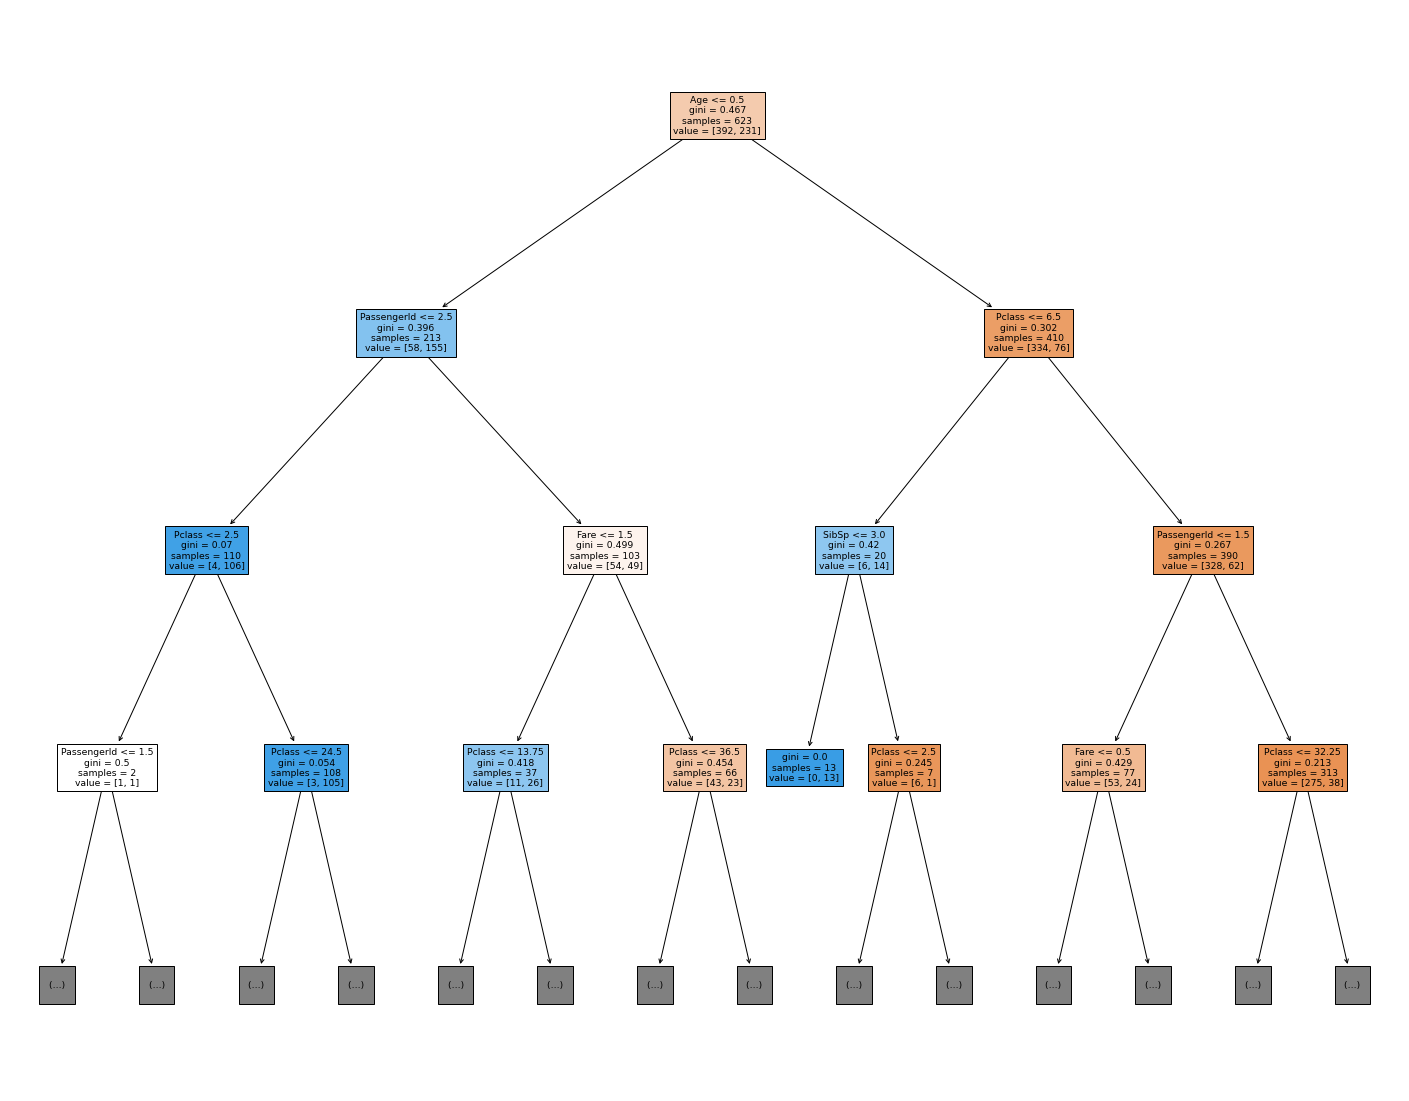

In [31]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dta,
                   feature_names = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'male', 'C', 'Q', 'S'],
                   max_depth = 3,
                   filled=True)

In [32]:
text_representation = tree.export_text(dta)
print(text_representation)

|--- feature_2 <= 0.50
|   |--- feature_0 <= 2.50
|   |   |--- feature_1 <= 2.50
|   |   |   |--- feature_0 <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  1.50
|   |   |   |   |--- class: 1
|   |   |--- feature_1 >  2.50
|   |   |   |--- feature_1 <= 24.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  24.50
|   |   |   |   |--- feature_1 <= 26.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  26.00
|   |   |   |   |   |--- class: 1
|   |--- feature_0 >  2.50
|   |   |--- feature_5 <= 1.50
|   |   |   |--- feature_1 <= 13.75
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  13.75
|   |   |   |   |--- feature_1 <= 21.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  21.50
|   |   |   |   |   |--- class: 1
|   |   |--- feature_5 >  1.50
|   |   |   |--- feature_1 <= 36.50
|   |   |   |   |--- feature_1 <= 30.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  30.50
|   |   |   |   |  

In [33]:
#  _____ _____ _____ 
# |   __|  |  |     |
# |__   |  |  | | | |
# |_____|\___/|_|_|_|

In [34]:
svcModel = SVC(kernel = 'linear').fit(X_train, y_train) # create svm model
y_pred = svcModel.predict(X_test) # predict test set

accuracy = accuracy_score(y_test, y_pred) # calculate accuracy

# print accuracy
print("Accuracy Score -> {}".format(accuracy))

Accuracy Score -> 0.7910447761194029


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       157
           1       0.77      0.70      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



Confusion Matrix for Support Vector Machines


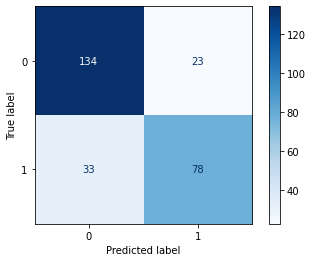

In [36]:
print("Confusion Matrix for Support Vector Machines")
support_confusion = plot_confusion_matrix(svcModel, X_test, y_test ,cmap=plt.cm.Blues , values_format='d')

CAN YOU IMPROVE THE MODEL ?

In [37]:
# use regularization and/or ensemble methods to see if you can improve the accuracy of your model

In [38]:
# use cross validation to see if that can improve the accuracy of the model

CODE ANALYSIS

### Why we chose these models : 
Since the target value (survived or not survived) was a categorical value, we chose logistic regression and svm. They're perfect models to examine the relationship between a dependent variable and other independent varaibles, which was perfect for this dataset. Next, we chose the popular decision tree model as it's also used for classifiation but also because it helped with visually understanding the information. 

### Which models were more accurate ? :

In terms of plain accuracy score the logistic regression was the most accurate with a score of 0.794. Second was the svm model with a score of 0.791 and lastly the decision tree model with a score of 0.75. If we take a closer look, we can see not only from the accuracy score, but also from the F1 score (the weighted average of precision and recall great for uneven class distribution datasets) of both predicting 0 and 1 respectively that the values for logisitc regression (0.83, 0.75) and svm (0.83,0.74) were basically the same. For the best results if this dataset continues to expand, I would choose the logistic regression model right now but I would continue analysis of the svm model as the results are almost identical.   

In [4]:
                precision    recall  f1-score   support

           0       0.81      0.84      0.83       157
           1       0.76      0.73      0.75       111

    accuracy                           0.79       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.79      0.79      0.79       268

                precision    recall  f1-score   support

           0       0.85      0.76      0.80       176
           1       0.61      0.74      0.67        92

    accuracy                           0.75       268
   macro avg       0.73      0.75      0.73       268
weighted avg       0.77      0.75      0.75       268

                precision    recall  f1-score   support

           0       0.80      0.85      0.83       157
           1       0.77      0.70      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 6)

### How did we determine accuracy? :

We determined accuracy using the accuracy_score function which compares our test values with the predicted test values. It's equal to the number of correct predictions divided by the number of all predictions. So if we dive deeper using the confusion matrix to get the accuracy of each model, we can simply add the number of correctly predicted true positives and true negatives for each model and divide by the total number of predictions. 

### Methods to improve accuracy :

As with any model, to improve accuracy we should definetly feed it with more training data so it can learn more. We can add more data or try 80% training data and 20% testing data but that might cause other issues. Additionally, we could have been more precise with filling the null values of age to the mean age of each class instead of to 100. 

### How did you test your model ? :

*Not sure if this answered the question

To test our model we used the train_test_split function with a train size of 70% and a test size of 30% with a random state of 42. In short, we used 70% of the data for learning to predict 30% of the data for each of the 3 models.